In [2]:
#import all the stuff you need
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session

# uncomment if you wanna use the tranfer entropy measure
import sys
testdir = os.getcwd() # os.path.dirname(__file__)
import smite

# fix slow autocomplete
%config Completer.use_jedi = False
%matplotlib inline

import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"
    data_root = "/run/media/tom.chartrand/Brain2019"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")

 
cache = EcephysProjectCache.fixed(manifest=manifest_path)

from aux_fun import get_binned_spike_trains, get_binned_spike_trains_sorted
from sanity_check import sanity_check




In [1]:


session_id=737581020
stim_type='drifting_gratings'#''#'spontaneous'natural_scenes''drifting_gratings
time_step = 1/100


In [8]:
import pickle
import matplotlib.pyplot as plt

corr_mat = pickle.load(open(str('corr_mat_' + stim_type + 'session_' + str(session_id) +'.pkl'),'rb'))

['the size of your matrix is(40, 147, 9)']


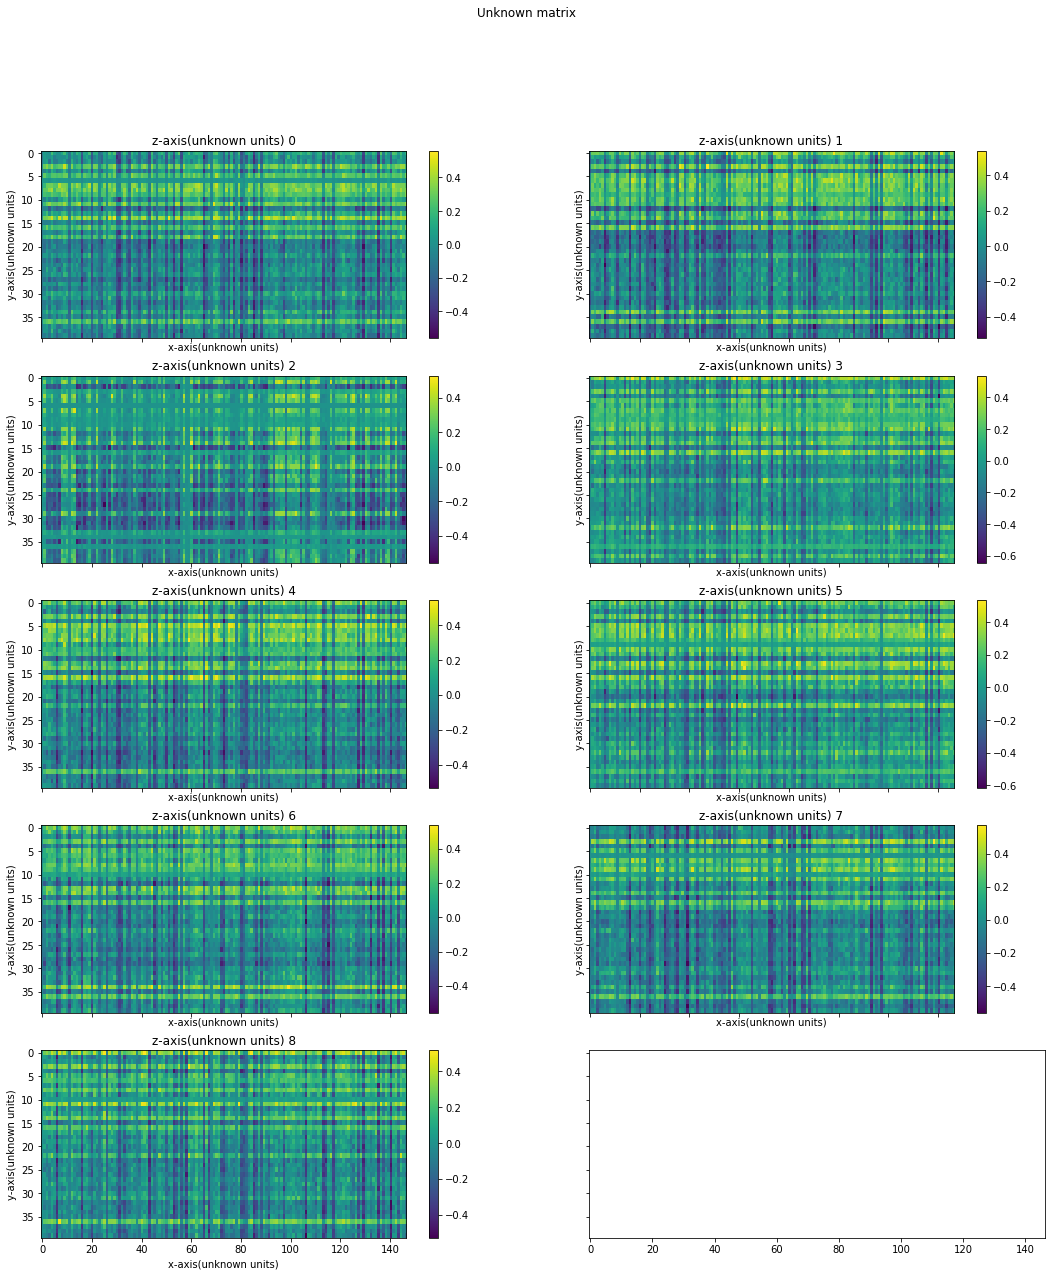

In [9]:
sanity_check(corr_mat, ncols=2)

In [59]:
V1_units = pickle.load(open(str('V1_clusters' + stim_type + 'session_' + str(session_id) +'.pkl'),'rb'))
V1_units.head()

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,location,sampling_rate,lfp_sampling_rate,Row_number,cluster
unit_id,,,,,,,,,,,,,,,,,,,,,
914615132,0.340521,49.533120,0.034790,467,368.04,3.883598,1.226418,0.327738,39.236432,0.046510,...,385.0,27,757988391,3240,probeC,,29999.998448,2499.999871,6,0
914615240,0.263063,47.705385,0.039381,521,292.67,3.467218,2.485168,0.239449,51.954025,0.018182,...,385.0,11,757988391,3220,probeC,,29999.998448,2499.999871,7,0
914615116,0.156496,53.904045,0.013805,459,105.45,3.723802,10.710719,0.030079,74.287969,0.013771,...,385.0,43,757988391,3220,probeC,,29999.998448,2499.999871,8,2
914615102,0.384715,200.737875,0.001206,452,143.61,4.983356,0.775855,0.000000,70.389660,0.000515,...,385.0,59,757988391,3160,probeC,,29999.998448,2499.999871,16,1
914615092,0.507623,56.373330,0.014300,447,200.40,3.983247,9.090181,0.132736,72.043371,0.018004,...,385.0,43,757988391,3140,probeC,,29999.998448,2499.999871,17,0


In [34]:
corr_mat[0,0,0]

-0.09505204029782133

['the size of your matrix is(40, 147)']


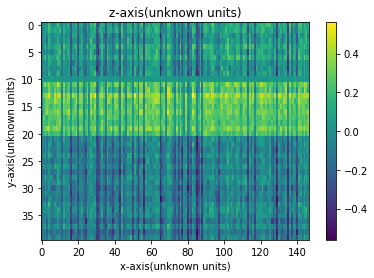

In [16]:
clusters = V1_units['cluster'].values
sort_ind= np.argsort(clusters)

sanity_check(corr_mat[sort_ind,:,0])




In [28]:
def pca_clustering(mat,clusters=3):

    from sklearn.decomposition import PCA
    pca = PCA(n_components=20)
    pca.fit(mat[:,:])
    pca.explained_variance_
    print(pca.explained_variance_ratio_)
    pca.components_ #eigenvectors
    X_project = pca.fit_transform(mat[:,:])
    max_pc = 3
    X_project.shape
    from sklearn.cluster import KMeans
    from scipy import stats

    kmeans = KMeans(n_clusters=clusters).fit(X_project[:,:clusters])
    cluster_ids = kmeans.labels_
    return cluster_ids


[0.86275913 0.02399979 0.00709649 0.00670613 0.00575974 0.00555594
 0.00520902 0.00498992 0.00480072 0.00457515 0.00443069 0.00413374
 0.00373098 0.0036307  0.00356647 0.0034873  0.00330283 0.00321355
 0.00297759 0.00288289]
[0.89536909 0.01018692 0.00552287 0.00496785 0.00475185 0.00450445
 0.00443209 0.00427591 0.00400322 0.00382898 0.00362495 0.00357394
 0.00331631 0.00329474 0.00322022 0.00302441 0.00292269 0.0027366
 0.00247349 0.00236941]
[0.79592456 0.11603482 0.00637158 0.00599512 0.00514858 0.00489786
 0.00464293 0.00452509 0.00417033 0.00404557 0.00376404 0.0036908
 0.00347667 0.0031774  0.00307066 0.00292942 0.00261863 0.00240604
 0.00236058 0.00216262]
[0.84499543 0.03605365 0.00827592 0.00649262 0.00619931 0.00590349
 0.0056573  0.00550983 0.00506412 0.00499582 0.00477404 0.00467411
 0.00434621 0.00414736 0.00372482 0.00348945 0.00339182 0.00324441
 0.00312535 0.00293963]
[0.87819697 0.01717228 0.00620329 0.00568398 0.00555794 0.00524585
 0.00503705 0.00457017 0.00444933 0

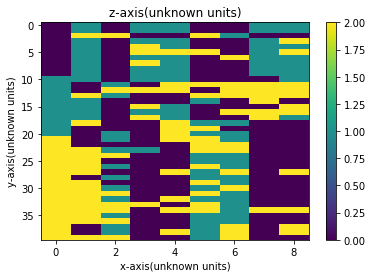

In [33]:
labels = np.empty([corr_mat.shape[0],9])
for itrial in range(9):

    labels[:,itrial] = pca_clustering(corr_mat[:,:,itrial]);

sort_ind= np.argsort(labels[:,0])    
sanity_check(labels[sort_ind,:])




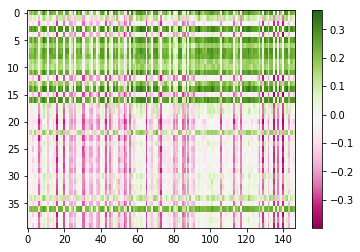

In [53]:
avg_corr_mat = np.mean(corr_mat,axis=2)
plt.imshow(avg_corr_mat, cmap = 'PiYG', aspect = 'auto')
plt.colorbar()

[9.65506385e-01 1.30146174e-02 1.50609961e-03 1.48504347e-03
 1.23039037e-03 1.08435812e-03 9.89657686e-04 9.76474542e-04
 9.45997296e-04 9.04720599e-04 8.43260015e-04 7.97399585e-04
 7.73211281e-04 7.42531726e-04 7.04369415e-04 6.73994150e-04
 6.37301039e-04 5.77314607e-04 5.62987026e-04 5.23671095e-04]


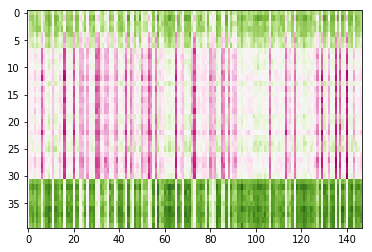

In [55]:
avg_labels = pca_clustering(avg_corr_mat[:,:],clusters=3);

sort_ind_avg= np.argsort(avg_labels)    


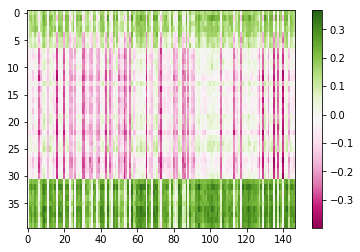

In [57]:

plt.imshow(avg_corr_mat[sort_ind_avg,:], cmap = 'PiYG', aspect = 'auto')
plt.colorbar()

In [60]:
V1_units

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,location,sampling_rate,lfp_sampling_rate,Row_number,cluster
unit_id,,,,,,,,,,,,,,,,,,,,,
914615132,0.340521,49.533120,0.034790,467,368.04,3.883598,1.226418,0.327738,39.236432,0.046510,...,385.0,27,757988391,3240,probeC,,29999.998448,2499.999871,6,0
914615240,0.263063,47.705385,0.039381,521,292.67,3.467218,2.485168,0.239449,51.954025,0.018182,...,385.0,11,757988391,3220,probeC,,29999.998448,2499.999871,7,0
914615116,0.156496,53.904045,0.013805,459,105.45,3.723802,10.710719,0.030079,74.287969,0.013771,...,385.0,43,757988391,3220,probeC,,29999.998448,2499.999871,8,2
914615102,0.384715,200.737875,0.001206,452,143.61,4.983356,0.775855,0.000000,70.389660,0.000515,...,385.0,59,757988391,3160,probeC,,29999.998448,2499.999871,16,1
914615092,0.507623,56.373330,0.014300,447,200.40,3.983247,9.090181,0.132736,72.043371,0.018004,...,385.0,43,757988391,3140,probeC,,29999.998448,2499.999871,17,0
914615090,0.440018,110.081790,0.000938,446,180.89,5.773952,1.276505,0.302523,73.071418,0.000280,...,385.0,27,757988391,3120,probeC,,29999.998448,2499.999871,20,1
914615076,0.497131,99.040500,0.002226,439,118.99,5.616537,0.764895,0.000000,73.619918,0.000203,...,385.0,43,757988391,3100,probeC,,29999.998448,2499.999871,26,0
914615068,0.480544,102.641370,0.024084,435,172.57,2.879170,1.854862,0.382076,50.080710,0.010081,...,385.0,59,757988391,3080,probeC,,29999.998448,2499.999871,30,1
914615066,0.485234,207.391665,0.004042,434,64.02,7.002088,0.979052,0.128568,73.597777,0.000410,...,385.0,59,757988391,3080,probeC,,29999.998448,2499.999871,31,1
